# 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

!pip install category_encoders
import category_encoders as ce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

컬럼에서 필요한 값들만 추출
- survived, pclass, sex, age, sibsp, parch, fare, embarekd

In [4]:
cols = ['survived', 'pclass', 'sex', 'sibsp', 'parch', 'fare', 'embarked', 'age']
df =df[cols]
df

,survived,pclass,sex,sibsp,parch,fare,embarked,age
0,0,3,male,1,0,7.2500,S,22.0
1,1,1,female,1,0,71.2833,C,38.0
2,1,3,female,0,0,7.9250,S,26.0
3,1,1,female,1,0,53.1000,S,35.0
4,0,3,male,0,0,8.0500,S,35.0
...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S,27.0
887,1,1,female,0,0,30.0000,S,19.0
888,0,3,female,1,2,23.4500,S,NaN
889,1,1,male,0,0,30.0000,C,26.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   sibsp     891 non-null    int64  
 4   parch     891 non-null    int64  
 5   fare      891 non-null    float64
 6   embarked  889 non-null    object 
 7   age       714 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


# 결측치 처리

In [6]:
df['age'].mean()

29.69911764705882

In [7]:
df['age'] = df['age'].fillna(df['age'].mean())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode().values[0])

df.isnull().sum().sum()

<ipython-input-7-cf9b6c93139c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].fillna(df['age'].mean())
<ipython-input-7-cf9b6c93139c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['embarked'] = df['embarked'].fillna(df['embarked'].mode().values[0])


0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   sibsp     891 non-null    int64  
 4   parch     891 non-null    int64  
 5   fare      891 non-null    float64
 6   embarked  891 non-null    object 
 7   age       891 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


# 데이터 분리

In [9]:
SEED = 42

f_cols =  ['pclass', 'sex', 'sibsp', 'parch', 'fare', 'embarked', 'age']

target = df['survived']
data = df[f_cols]

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=SEED)

X_train.shape, y_train.shape

((712, 7), (712,))

In [10]:
X_train

,pclass,sex,sibsp,parch,fare,embarked,age
331,1,male,0,0,28.5000,S,45.500000
733,2,male,0,0,13.0000,S,23.000000
382,3,male,0,0,7.9250,S,32.000000
704,3,male,1,0,7.8542,S,26.000000
813,3,female,4,2,31.2750,S,6.000000
...,...,...,...,...,...,...,...
106,3,female,0,0,7.6500,S,21.000000
270,1,male,0,0,31.0000,S,29.699118
860,3,male,2,0,14.1083,S,41.000000
435,1,female,1,2,120.0000,S,14.000000


# One Hot Encoding

In [11]:
to_category = ['sibsp', 'parch', 'pclass']

for col in to_category :
  X_train[col] = X_train[col].astype('category')
  X_test[col] = X_test[col].astype('category')

In [12]:
en_tr = X_train.drop(['fare', 'age'], axis=1).reset_index(drop=True)
en_tr.head()

,pclass,sex,sibsp,parch,embarked
0,1,male,0,0,S
1,2,male,0,0,S
2,3,male,0,0,S
3,3,male,1,0,S
4,3,female,4,2,S


In [13]:
en_te = X_test.drop(['fare', 'age'], axis=1).reset_index(drop=True)
en_te.head()

,pclass,sex,sibsp,parch,embarked
0,3,male,1,1,C
1,2,male,0,0,S
2,3,male,0,0,S
3,2,female,0,1,S
4,3,female,1,0,C


In [14]:
tmp_tr = X_train[['fare', 'age']].reset_index(drop=True)
tmp_te = X_test[['fare', 'age']].reset_index(drop=True)

In [15]:
tmp_tr

,fare,age
0,28.5000,45.500000
1,13.0000,23.000000
2,7.9250,32.000000
3,7.8542,26.000000
4,31.2750,6.000000
...,...,...
707,7.6500,21.000000
708,31.0000,29.699118
709,14.1083,41.000000
710,120.0000,14.000000


In [16]:
encoder = ce.OneHotEncoder(use_cat_names=True)

In [17]:
en_tr = encoder.fit_transform(en_tr)
en_te = encoder.transform(en_te)

In [18]:
en_tr.shape, en_te.shape

((712, 22), (179, 22))

#스케일링

In [30]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [31]:
tmp_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fare    712 non-null    float64
 1   age     712 non-null    float64
dtypes: float64(2)
memory usage: 11.2 KB


In [32]:
tmp_tr.skew()

fare    4.875066
age     0.359966
dtype: float64

In [33]:
tmp_tr.kurt()

fare    33.679535
age      0.915497
dtype: float64

In [34]:
scaler = StandardScaler()

scaled_tr = scaler.fit_transform(tmp_tr)
scaled_te = scaler.transform(tmp_te)

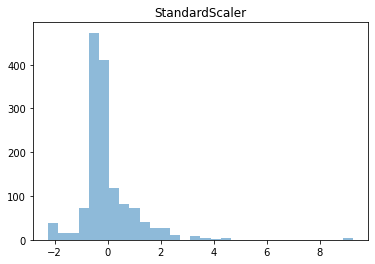

In [35]:
scaled_tr_ss = scaled_tr.reshape(-1, 1)
scaled_te_ss = scaled_te.reshape(-1, 1)

plt.hist(scaled_tr_ss, bins=30, alpha=0.5, label='fare')

plt.title("StandardScaler")
plt.show()

# 데이터 프레임 합치기

In [39]:
scaled_tr = pd.DataFrame(scaled_tr)
scaled_tr.columns = ['fare', 'age']

scaled_te = pd.DataFrame(scaled_te)
scaled_te.columns = ['fare', 'age']

In [40]:
scaled_tr

,fare,age
0,-0.078684,1.229207
1,-0.377145,-0.503505
2,-0.474867,0.189580
3,-0.476230,-0.272477
4,-0.025249,-1.812666
...,...,...
707,-0.480162,-0.657524
708,-0.030545,0.012390
709,-0.355804,0.882665
710,1.683201,-1.196590


In [26]:
X_train = pd.concat([scaled_tr, en_tr], axis=1)
X_test = pd.concat([scaled_te, en_te], axis=1)
X_train.shape, X_test.shape

((712, 24), (179, 24))

# 모델 만들기

In [27]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

tr_score = model.score(X_train, y_train)
te_score = model.score(X_test, y_test)

In [28]:
tr_score, te_score

(0.9803370786516854, 0.770949720670391)